
# "No-show" Medical Appointments in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction


In this notebook we will be exploring the "No-show appointments" dataset. It collects information from 100,000 medical appointments in Brazil, with a focus on whether or not they showed up for their appointment. I chose this one as I felt it was the one I had the least knowledge of, so it will be interesting to explore.

We will be exploring and trying to ask several questions to try and find factors linked to whether a patient attends/misses their appointment. Primarily we will be looking at the impact of receiving a text reminder, time between scheduling and appointment, and age.

It should be noted that this is just a preliminary exploration. Any findings are *very* tentative and should not be taken as fact.

Let's begin!

In [1]:
#Load as the libraries we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set visualizations to appear inline
%matplotlib inline

<a id='wrangling'></a>

## Data Wrangling

Now we will dig into the dataset and look for anything we need to clean up.

### General Properties

In [2]:
df = pd.read_csv('noshow-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


So we have a basic idea of how the dataset is set up. We have a patient id, followed by some details about them, and whether or not they showed up for their appointment. 

Next, let's learn some more about the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Good, we have no null values and most the columns are a good type. We will want to change ScheduledDay and AppointmentDay to datetimes, and create another column from No-show that is 0 or 1 (and reversed from the current column's confusing convention).

Let's dig deeper!

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Most of the values seem reasonable, except Age. Let's look at that one closer.

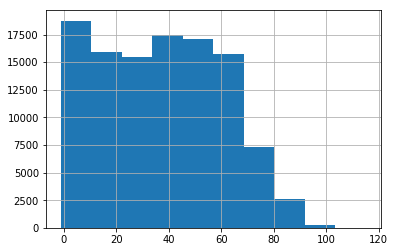

In [5]:
df['Age'].hist()

In [6]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


The one -1 year old patient seems suspect. This was likely a typo or a special situation. We can safely remove that one.

As for the "90 and over" patients, we will be removing them too as data points begin to get thin.

Now to make sure each appointment is unique.

In [7]:
df[df.duplicated('AppointmentID')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Looks good there. Now that we understand our dataset better, we can start the cleaning process



### Cleaning our data and creating useful new columns 

In [8]:

df.columns = df.columns.str.lower().str.replace('-','_')
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

First thing I wanted to do is make the columns lowercase and remove the hyphen from "no-show". This just makes the column names easier to deal with

In [9]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'] )
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointment_wait'] = (df['appointmentday'].dt.date - df['scheduledday'].dt.date).dt.days


Converting the appointmentday and scheduleday to datetimes. We are also creating a new column, appointment_wait, that tracks how far apart their scheduling day and appointment day are. We can explore this later on.

In [10]:
df['showed_up'] = np.where(df['no_show']=='No', 1, 0)

Create a new column with a "1" if they showed up, 0 if they didn't.

In [11]:
df.drop(df[(df['age'] < 0)| (df['age']>=90)].index, inplace=True)


Remove the age extremes. Now let's double check what we have so far

In [12]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,appointment_wait,showed_up
count,1.101090e+05,1.101090e+05,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000
mean,1.475219e+14,5.675341e+06,36.879083,0.098639,0.195543,0.071620,0.030515,0.021887,0.321263,10.173010,0.798073
std,2.561227e+14,7.119844e+04,22.898680,0.298178,0.396620,0.257859,0.172001,0.160297,0.466964,15.222625,0.401440
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000
25%,4.169967e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.172598e+13,5.680565e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,9.439381e+13,5.725543e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,1.000000
max,9.999816e+14,5.790484e+06,89.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,1.000000


We seem to have some problem with our new appointment_wait column.

In [13]:
df.query('appointment_wait < 0 ')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_wait,showed_up
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1,0
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1,0
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1,0
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6,0
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1,0


Some rows seem to have schedule days after their appointment days. We will need to remove these rows

In [14]:
df.drop(df[df['appointment_wait'] < 0].index, inplace=True)

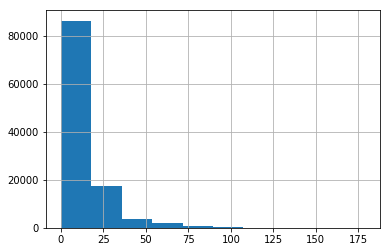

In [15]:
df['appointment_wait'].hist();

In [16]:
df.drop(df[df['appointment_wait'] > 50].index, inplace=True)

I also decided to drop those with and appointment wait greater than 50, as data starts getting pretty thin.

<a id='eda'></a>
## Exploratory Data Analysis

### Are SMS texts correlated with showing up for appointments?
First let's explore the popularity of SMS texts in our dataset

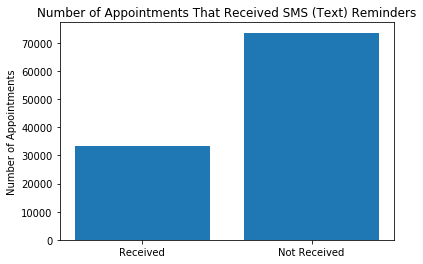

In [17]:
received = df.query('sms_received == 1')
not_received = df.query('sms_received == 0')

received_count = len(received.index)
not_received_count = len(not_received.index)

locations = [1, 2]
heights = [received_count, not_received_count]
labels = ['Received', 'Not Received']

plt.bar(locations, heights, tick_label=labels)

plt.title('Number of Appointments That Received SMS (Text) Reminders')
plt.ylabel('Number of Appointments');


Looks like most appointments don't receive them.  

Now, let's see if sms_received seems correlated with any other columns

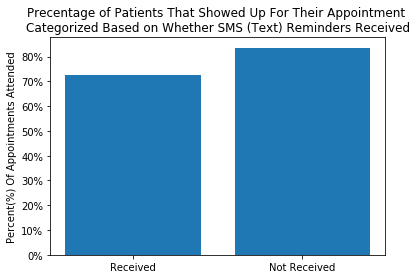

In [18]:
received_mean = received['showed_up'].mean()
not_received_mean = not_received['showed_up'].mean()

heights = [received_mean, not_received_mean]

plt.bar(locations, heights, tick_label=labels)

plt.title('Precentage of Patients That Showed Up For Their Appointment \n'
          'Categorized Based on Whether SMS (Text) Reminders Received')
plt.ylabel('Percent(%) Of Appointments Attended')


plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;

Interesting! It seems those who received SMS reminders were *less* likely to show up for their appointment!

However, it would be dangerous to draw the conclusion that receiving a reminder discourages attendence. It is highly likely that receiving reminders is correlated to other factors. 

While it is beyond the scope of this preliminary exploration to fully tease out what is happeneing here, let's at least see if receiving reminder is correlated with anything besides attendence.

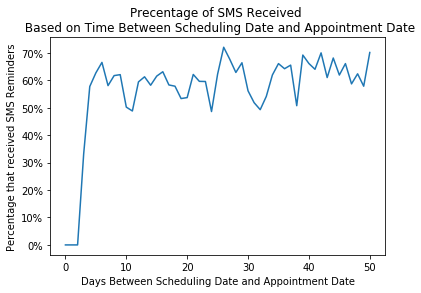

In [19]:
wait_df = df.groupby('appointment_wait').mean()

wait_time = wait_df.index.values
sms = wait_df['sms_received']
plt.plot(wait_time, sms)
plt.title("Precentage of SMS Received \n Based on Time Between Scheduling Date and Appointment Date")
plt.xlabel("Days Between Scheduling Date and Appointment Date")
plt.ylabel("Percentage that received SMS Reminders")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;


There's an interesting discovery. Patients with appointment waits shorter than three days **never** receive SMS alerts. We will be exploring appointment wait time more later.

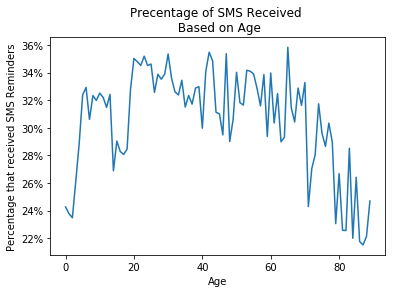

In [20]:
age_df = df.groupby('age').mean()

age = age_df.index.values
sms = age_df['sms_received']

plt.plot(age, sms)
plt.title("Precentage of SMS Received \n Based on Age")
plt.xlabel("Age")
plt.ylabel("Percentage that received SMS Reminders")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;

It seems the younger and older patients are less likely to receive SMS reminders. We will be exploring age more too.

### Is the time between schedule date and appointment date correlated with showing up for appointments?

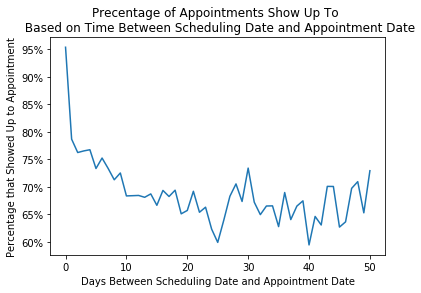

In [21]:
showed = wait_df['showed_up'][:60]
plt.plot(wait_time, showed)
plt.title("Precentage of Appointments Show Up To \n Based on Time Between Scheduling Date and Appointment Date")
plt.xlabel("Days Between Scheduling Date and Appointment Date")
plt.ylabel("Percentage that Showed Up to Appointment")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;

I'd say there is some correlation! People with same day appointments almost always attend and those with only a few days wait are more likely than those scheduled out farther.

Of course, same as before, we are only showing correlation, not causation. Same things we don't know:
1. We don't know if same day appointments are all actually scheduled, or walk ins
2. We don't know if a shorter wait time is correlated to more urgent problems.
3. We don't know if short wait times are easier to remember
4. We don't know if some completely other variable or combination of variables is responsible for this.

### Is age correlated with showing up for appointments?

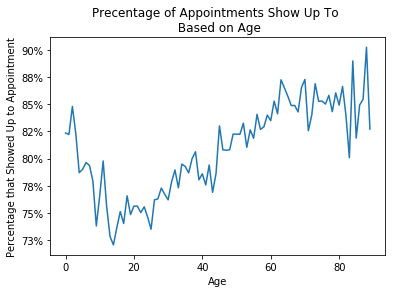

In [22]:
showed = age_df['showed_up']
plt.plot(age, showed)
plt.title("Precentage of Appointments Show Up To \n Based on Age")
plt.xlabel("Age")
plt.ylabel("Percentage that Showed Up to Appointment")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) ;

It seems attendence drops as we move from birth into the teenage years, then begins to gradually go from there. 

Same as before, we don't know why this happens. Do the young and old have more urgent medical issues? Do new parents and the elderly take scheduled appointments more seriously?

That's what I love about data. You always want more!

<a id='limitations'></a>

## Limitations

While we made some interesting discoveries,  its important to remember there are severe limitations with preliminary investigation.

1. Our data may still contain typo'd data. We only discovered the negative appointment wait times by sheer accident.
2. We made assumptions about what the data was represting. Namely, we believed "sms_received" could be translated "Was sent a text reminder". While this was a comfortable guess, it is still a guess.
3. We did not account for patients while multiple appointments. Our data could be skewed by regulars who always show up, or constant missers. We also don't if a no show followed by a show is a missed appointment, or a rescheduling.
4. We found complex relationships that we didn't fully explore. sms_received had correlations with both age and appointment_wait. Given that we only explored a small subset of our available variables, we have no idea if the ones we explored are "important indicators" or simply reflections of other variables.

<a id='conclusions'></a>

## Conclusions

We learned a lot today. Let's summarize something of the things we learned:
1. Interestingly, those who received SMS reminders were *less* likely to show up for their appointment. However, we learned that whether or not someone received a text wasn't random. While there may be other factors, we discovered those with wait times of 0, 1, or 2 days **never** received alerts (and as we learned later, that group is more likely than average to show up). Also, we saw that the younger and older patients we less likely to receive SMS (these groups also being more likely to attend).
2. Same day appointments show up way more frequently than those with a wait time. Attendance begins to drop during the first two weeks of waiting, before leveling off.
3. Attendance is highest for the young and the old, with the teenage years being the lowest.

